In [50]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass


`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM


In [60]:
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8, return_sequences=True))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary( )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 8)           1312      
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,865
Trainable params: 33,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)
random_index = np.random.permutation(25000)
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [61]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.4623 - accuracy: 0.7850 - val_loss: 0.3781 - val_accuracy: 0.8352
Epoch 2/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.3419 - accuracy: 0.8579 - val_loss: 0.3462 - val_accuracy: 0.8496
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/sample - loss: 0.3184 - accuracy: 0.8673 - val_loss: 0.3597 - val_accuracy: 0.8460
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/sample - loss: 0.2981 - accuracy: 0.8758 - val_loss: 0.3571 - val_accuracy: 0.8518
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2842 - accuracy: 0.8816 - val_loss: 0.3601 - val_accuracy: 0.8394
Epoch 6/10
20000/20000 [==============================] - 47s 2ms/sample - loss: 0.2692 - accuracy: 0.8878 - val_loss: 0.3812 - val_accuracy: 0.8422
Epoch 7/10
20000/20000 [==============================] -

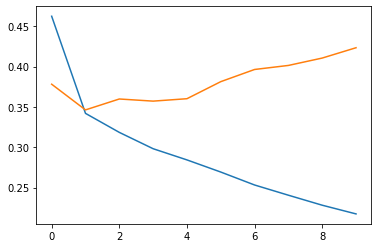

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [63]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8296
